### Python3系 で オンメモリ画像の Base64 変換のEnc、Decを試すやつ

Python2.x と 3.xではdecodeの動作が異なりるので、動作をスイッチさせる例

以下記事を参考

https://qiita.com/Hironsan/items/1d1a43f0fae05372f9b4

In [1]:
from __future__ import print_function
from PIL import Image
import base64
import numpy as np
import cv2

In [2]:
# Encode base64 img
def encode_base64(cv2img):
    cnt = cv2.imencode('.jpg',cv2img)[1]
    b64 = base64.b64encode(cnt)

    try:
        # Python2
        b64_str = "data:image/jpeg;base64," + b64
    except TypeError:
        # Python3
        b64_str = "data:image/jpeg;base64," + b64.decode("utf8")

    return b64_str

# Decode base64 img
def decode_base64(b64_str):
    encoded_data = b64_str.split(',')[1]
    jpg_bytes = base64.b64decode(encoded_data.encode())
    ret_img = cv2.imdecode(np.frombuffer(jpg_bytes, dtype=np.uint8), -1)
    return ret_img

---


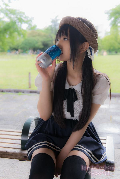

In [3]:
in_img = Image.open("lenfried.jpg")
img_size = in_img.size
img_resize = tuple(np.int32(np.array(img_size)*0.2))
in_img = in_img.resize(img_resize)
in_img



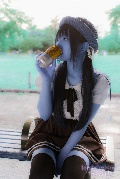

In [4]:
# エンコード
in_img_cv = np.uint8(in_img)
enc_img = encode_base64(in_img_cv)
print(enc_img) # 文字列をそのままブラウザのURL欄に突っ込んでも画像が表示されるゾイ

In [5]:
# デコード
dec_img = decode_base64(enc_img)

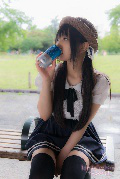

In [6]:
Image.fromarray(dec_img)